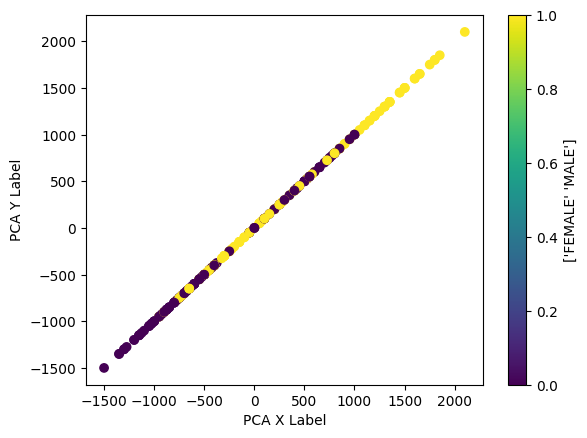

In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("penguins.csv")
df = pd.DataFrame(data)

# df['total'] = df['bill_length_mm'] + df['bill_depth_mm'] + df['flipper_length_mm'] + df['body_mass_g']

df['target'] = df['sex']
df = df.dropna()
X = df[['flipper_length_mm','bill_length_mm','bill_depth_mm','body_mass_g']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pca = PCA(n_components=1)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

label_encoder = LabelEncoder()

y_train_encode = label_encoder.fit_transform(y_train)

plt.scatter(X_train_pca, X_train_pca, c=y_train_encode)
plt.xlabel("PCA X Label")
plt.ylabel("PCA Y Label")
plt.colorbar(label=np.unique(y_train))
plt.show()


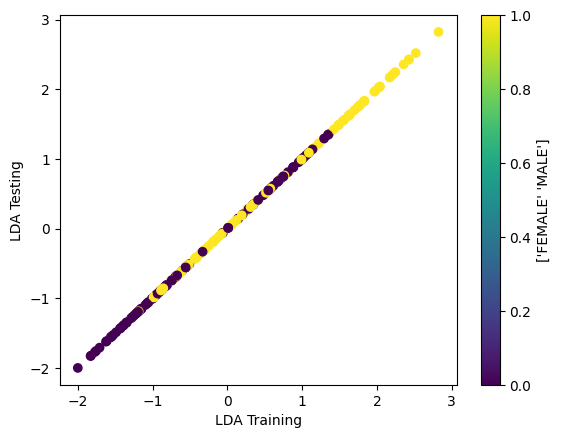

In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("penguins.csv")
df = pd.DataFrame(data)

df['total'] = df['bill_length_mm'] + df['bill_depth_mm'] + df['flipper_length_mm'] + df['body_mass_g']
df['target'] = df['sex']
df = df.dropna()
X = df[['total']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.fit_transform(X_test, y_test)

label_encoder = LabelEncoder()

y_train_encode = label_encoder.fit_transform(y_train)

plt.scatter(X_train_lda, X_train_lda, c=y_train_encode)
plt.xlabel("LDA Training")
plt.ylabel("LDA Testing")
plt.colorbar(label=np.unique(y_train))
plt.show()


train error
0.4294230119393525
0.21471150596967625
0.14113815593959955
0.46336972923322933
test error
0.4364501381430379
0.22392900703977528
0.10284852948807977
0.47321137670154895


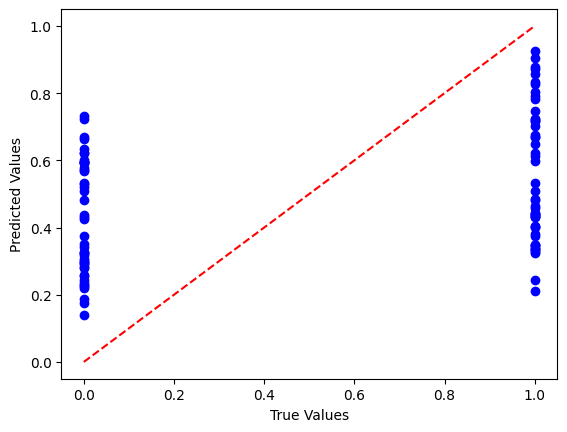

In [72]:
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("penguins.csv")
df = pd.DataFrame(data)

df['total'] = df['bill_length_mm'] + df['bill_depth_mm'] + df['flipper_length_mm']
df['target'] = df['sex']
df = df.dropna()
X = df[['total']]
y = df['target']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_rmse = root_mean_squared_error(y_train, y_pred_train)
test_rmse = root_mean_squared_error(y_test, y_pred_test)

print("train error")
print(train_mae)
print(train_mse)
print(train_r2)
print(train_rmse)
print("test error")
print(test_mae)
print(test_mse)
print(test_r2)
print(test_rmse)

plt.scatter(y_test, y_pred_test, color = "blue", label="prediction")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color = "red" ,linestyle="--", label="Perfect prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()





train
3936.950214592275
16141699.198712448
-56167.007116412984
test
3963.5310000000004
16288826.2971
-53464.21346749949


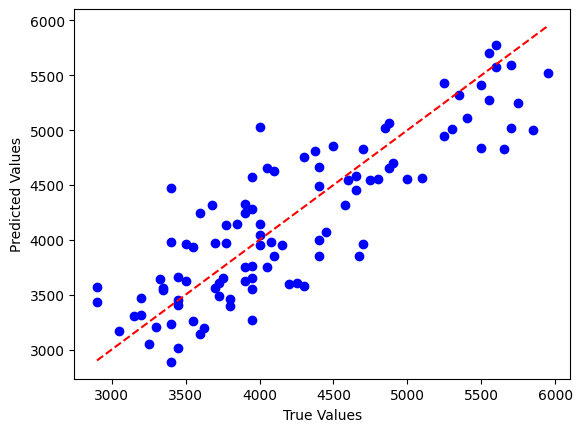

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv("penguins.csv")
df = pd.DataFrame(data)
df['total'] = df['bill_depth_mm'] + df['bill_length_mm'] + df['flipper_length_mm']
df['target'] = df['body_mass_g']
df = df.dropna()
X = df[['total']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mae = mean_absolute_error(X_train, y_train)
test_mae = mean_absolute_error(X_test, y_test)
train_mse = mean_squared_error(X_train, y_train)
test_mse = mean_squared_error(X_test, y_test)
train_r2 = r2_score(X_train, y_train)
test_r2 = r2_score(X_test, y_test)

print("train")
print(train_mae)
print(train_mse)
print(train_r2)
print("test")
print(test_mae)
print(test_mse)
print(test_r2)

plt.scatter(y_test, y_pred_test, color = "blue", label="prediction")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="prefect prediction")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

              precision    recall  f1-score   support

      FEMALE       0.73      0.64      0.68       117
        MALE       0.68      0.76      0.72       116

    accuracy                           0.70       233
   macro avg       0.70      0.70      0.70       233
weighted avg       0.70      0.70      0.70       233

[[75 42]
 [28 88]]


Text(0, 0.5, 'bill_depth_mm')

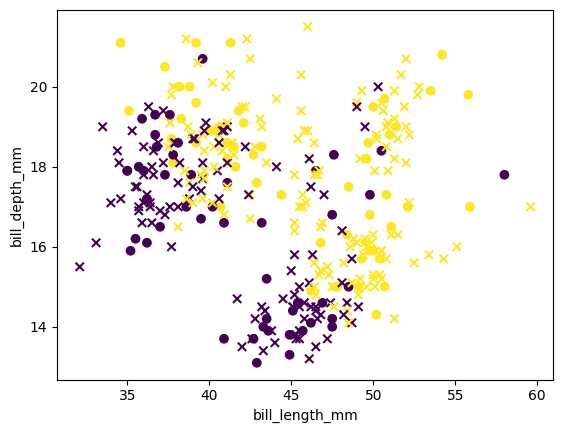

In [85]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("penguins.csv")
df = pd.DataFrame(data)

df['target'] = df['sex']
df = df.dropna()
X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm']]
y = df['target']

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.3 ,random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# y_pred_train = model.predict(X_train)
# print()
y_pred_test = model.predict(X_test)

c_rep = classification_report(y_test, y_pred_test)
con_matrix = confusion_matrix(y_test, y_pred_test)

print(c_rep)
print(con_matrix)
y_train_encoded = label_encoder.fit_transform(y_train)
y_pred_encoded = label_encoder.fit_transform(y_pred_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train_encoded, label="feature1" )
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred_encoded, marker = "x",label = "feature2")
plt.xlabel("bill_length_mm")
plt.ylabel("bill_depth_mm")


               precision    recall  f1-score   support

       jaguar       0.00      0.00      0.00         1
        mazda       0.00      0.00      0.00         4
mercedes-benz       0.00      0.00      0.00         3
   mitsubishi       0.08      0.50      0.14         2
       nissan       0.00      0.00      0.00         4
      porsche       0.00      0.00      0.00         1

     accuracy                           0.07        15
    macro avg       0.01      0.08      0.02        15
 weighted avg       0.01      0.07      0.02        15

[[0 0 0 1 0 0]
 [2 0 0 2 0 0]
 [0 0 0 3 0 0]
 [1 0 0 1 0 0]
 [0 0 0 4 0 0]
 [0 0 0 1 0 0]]


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0, 0.5, 'length')

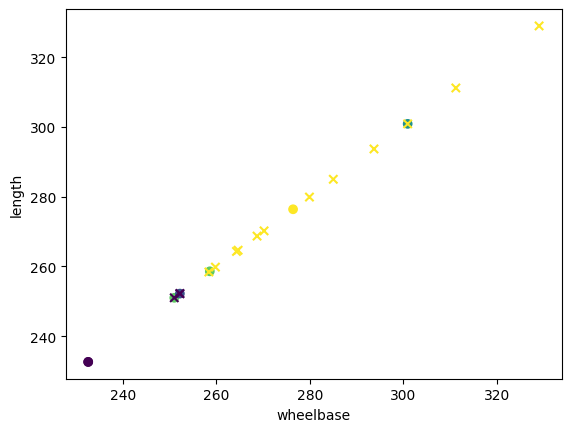

In [77]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("data.csv")
df = pd.DataFrame(data)

df['total'] = df['wheelbase'] + df['length']
df['target'] = df['company']
df = df.dropna()
X = df[['total']]
y = df['target']

X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.3 ,random_state=42)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

c_rep = classification_report(y_test, y_pred_test)
con_matrix = confusion_matrix(y_test, y_pred_test)

print(c_rep)
print(con_matrix)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_pred_test_encoded = label_encoder.transform(y_pred_test)

plt.scatter(X_train,X_train,c=y_train_encoded, label="feature1" )
plt.scatter(X_test, X_test,c=y_pred_test_encoded, marker = "x",label = "feature2")
plt.xlabel("wheelbase")
plt.ylabel("length")


              precision    recall  f1-score   support

      Setosa       0.74      0.94      0.83        31
  Versicolor       0.70      0.38      0.49        37
   Virginica       0.67      0.84      0.75        37

    accuracy                           0.70       105
   macro avg       0.71      0.72      0.69       105
weighted avg       0.70      0.70      0.68       105

[[29  2  0]
 [ 8 14 15]
 [ 2  4 31]]


Text(0, 0.5, 'Variety')

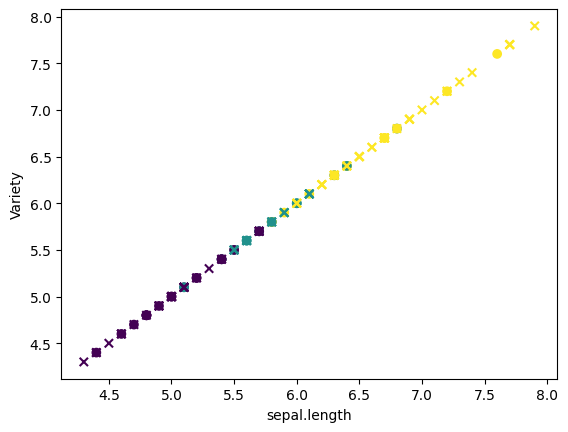

In [94]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv("iris.csv")
df = pd.DataFrame(data)

df['total'] = df['sepal.length']
df['target'] = df['variety']
df = df.dropna()
X = df[['total']]
y = df['target']
k=5
X_test, X_train, y_test, y_train = train_test_split(X,y, test_size = 0.3 ,random_state=42)
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)

c_rep = classification_report(y_test, y_pred_test)
con_matrix = confusion_matrix(y_test, y_pred_test)

print(c_rep)
print(con_matrix)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_pred_test_encoded = label_encoder.transform(y_pred_test)

plt.scatter(X_train,X_train,c=y_train_encoded, label="feature1" )
plt.scatter(X_test, X_test,c=y_pred_test_encoded, marker = "x",label = "feature2")
plt.xlabel("sepal.length")
plt.ylabel("Variety")


Accuracy: 0.9782608695652174

Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.93      1.00      0.96        13
   Virginica       1.00      0.93      0.96        14

    accuracy                           0.98        46
   macro avg       0.98      0.98      0.98        46
weighted avg       0.98      0.98      0.98        46


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 13]]


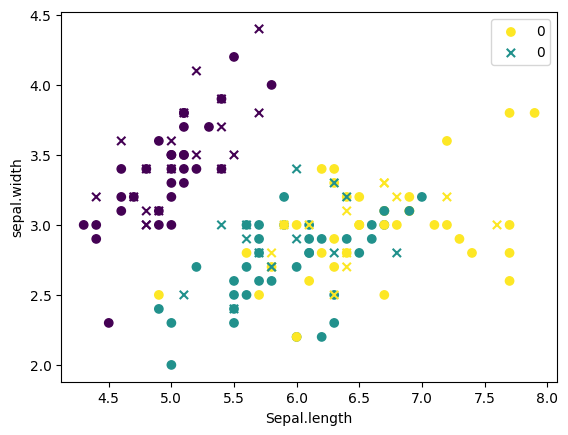

In [90]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


data = pd.read_csv("iris.csv")
df = pd.DataFrame(data)


X = df[['petal.length','petal.width','sepal.length','sepal.width']]
y = df['variety']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
NB = GaussianNB()
NB.fit(X_train, y_train)

y_pred = NB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


label_encoder = LabelEncoder()
y_train_encode = label_encoder.fit_transform(y_train)
y_pred_encoded = label_encoder.fit_transform(y_pred)

X_train = np.array(X_train)
X_test = np.array(X_test)

plt.scatter(X_train[:,2], X_train[:,3], c=y_train_encode, label="Trained")
plt.scatter(X_test[:,2], X_test[:,3], c= y_pred_encoded,marker="x", label="predicted")
plt.legend(y_train_encoded)
plt.xlabel("Sepal.length")
plt.ylabel("sepal.width")
plt.show()



In [17]:
X_train[:10],X_train[:10,0]

(array([[6.1, 2.5, 7.2, 3.6],
        [4.8, 1.8, 6.2, 2.8],
        [4.4, 1.4, 6.6, 3. ],
        [5. , 2. , 5.7, 2.5],
        [4.4, 1.4, 6.7, 3.1],
        [5.4, 2.1, 6.9, 3.1],
        [5.8, 1.8, 6.7, 2.5],
        [5.5, 2.1, 6.8, 3. ],
        [1.4, 0.2, 5.1, 3.5],
        [3.5, 1. , 5. , 2. ]]),
 array([6.1, 4.8, 4.4, 5. , 4.4, 5.4, 5.8, 5.5, 1.4, 3.5]))

1.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      1.00      1.00        13
   Virginica       1.00      1.00      1.00        14

    accuracy                           1.00        46
   macro avg       1.00      1.00      1.00        46
weighted avg       1.00      1.00      1.00        46



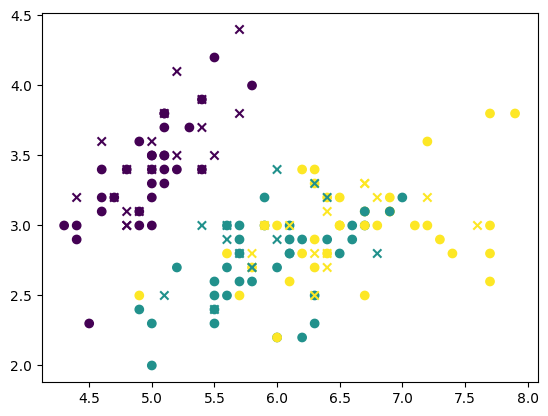

In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("iris.csv")
df = pd.DataFrame(data)


X = df[['petal.length','petal.width','sepal.length','sepal.width']]
y = df['variety']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracyscore = accuracy_score(y_test, y_pred)
confusionmatrix = confusion_matrix(y_test, y_pred)
classificationreport = classification_report(y_test, y_pred)
print(accuracyscore)
print(confusionmatrix)
print(classificationreport)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_pred_encoded = label_encoder.fit_transform(y_pred)

X_train = np.array(X_train)
X_test = np.array(X_test)

plt.scatter(X_train[:,2], X_train[:,3], c = y_train_encoded, label="Training")
plt.scatter(X_test[:,2], X_test[:,3], c = y_pred_encoded, marker="x", label="prediction")
plt.show()


0.8695652173913043
[[19  0  0]
 [ 0 13  0]
 [ 0  6  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.68      1.00      0.81        13
           2       1.00      0.57      0.73        14

    accuracy                           0.87        46
   macro avg       0.89      0.86      0.85        46
weighted avg       0.91      0.87      0.86        46



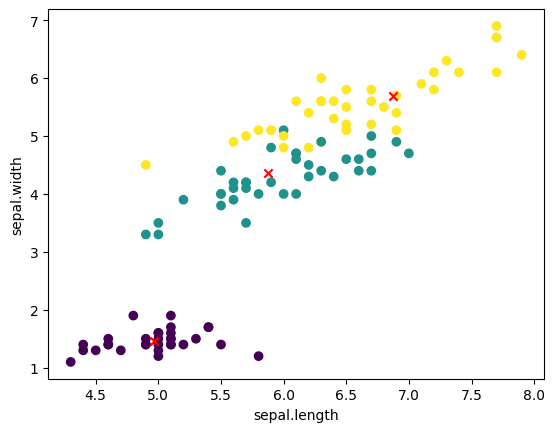

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

data = pd.read_csv("iris.csv")
data.dropna(inplace=True)
df = pd.DataFrame(data)

# X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
# y = df['sex']
X = df[['petal.length','petal.width','sepal.length','sepal.width']]
y = df['variety']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.3,random_state=42)
KM = KMeans(n_clusters=3)
KM.fit(X_train, y_train)

y_pred = KM.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
classReport = classification_report(y_test, y_pred)
print(classReport)


X_train = np.array(X_train)
X_test = np.array(X_test)
centers = KM.cluster_centers_

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_pred_encoded = label_encoder.fit_transform(y_pred)
plt.scatter(X_train[:,2], X_train[:,0],c = y_train_encoded )
plt.scatter(centers[:,2], centers[:,0], color="red", marker="x" )
plt.xlabel("sepal.length")
plt.ylabel("sepal.width")
plt.show()